In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import random

In [6]:
path_1 = 'dataset/HAM10000_images_part_1'
path_2 = 'dataset/HAM10000_images_part_2'
meta_path = 'dataset/HAM10000_metadata.csv'
classes = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
encoder = {
    'nv': 1,
    'mel': 2,
    'bkl': 3,
    'bcc': 4,
    'akiec': 5,
    'vasc': 6,
    'df': 7
}
meta = pd.read_csv(meta_path)
meta.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


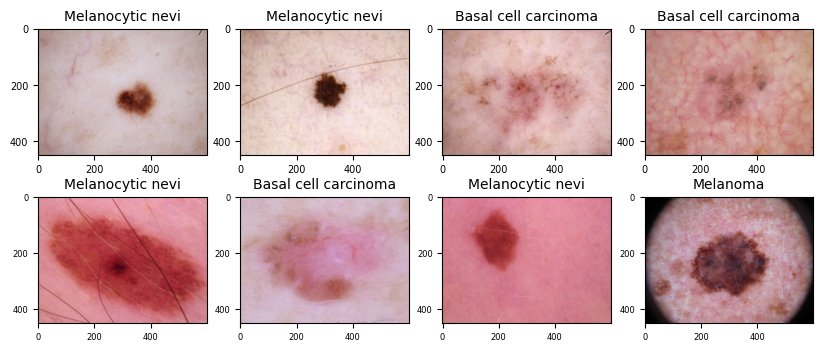

In [7]:
plt.figure(figsize = (10,4))
for i, img_name in enumerate(random.sample(os.listdir(path_1),4)):
    plt.subplot(2,4,i+1)
    class_name = meta.loc[meta.image_id == img_name.split('.')[0]].dx.values[0]
    img = cv.imread(os.path.join(path_1,img_name))
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.title(classes[class_name], fontsize=10)
    plt.imshow(img)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    
for i, img_name in enumerate(random.sample(os.listdir(path_2),4)):
    plt.subplot(2,4,4+i+1)
    class_name = meta.loc[meta.image_id == img_name.split('.')[0]].dx.values[0]
    img = cv.imread(os.path.join(path_2,img_name))
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.title(classes[class_name], fontsize=10)
    plt.imshow(img)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

In [8]:
heights = []
widths = []
labels = []
for i, img_name in enumerate(os.listdir(path_1)):
    class_name = meta.loc[meta.image_id == img_name.split('.')[0]].dx.values[0]
    img = cv.imread(os.path.join(path_1,img_name))
    h,w,_ = img.shape
    heights.append(h)
    widths.append(w)
    labels.append(encoder[class_name])

for i, img_name in enumerate(os.listdir(path_2)):
    class_name = meta.loc[meta.image_id == img_name.split('.')[0]].dx.values[0]
    img = cv.imread(os.path.join(path_2,img_name))
    h,w,_ = img.shape
    heights.append(h)
    widths.append(w)
    labels.append(encoder[class_name])


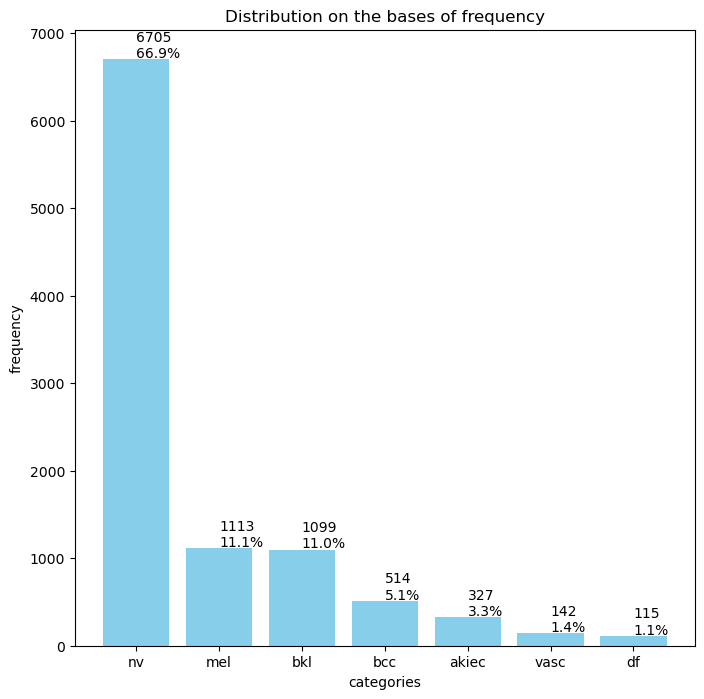

In [9]:
class_buckets = [0 for _ in range(7)]
for i in range(len(labels)): class_buckets[labels[i] - 1] += 1
categories = ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

plt.figure(figsize=(8,8))
bars = plt.bar(categories, class_buckets, color='skyblue')

total = sum(class_buckets)
percentages = [(i/total)*100 for i in class_buckets]

plt.title('Distribution on the bases of frequency')
plt.xlabel('categories')
plt.ylabel('frequency')
for bar, value, percentage in zip(bars, class_buckets, percentages):
#     print(bar.get_height())
    plt.text(bar.get_x()+bar.get_width()/2.0,bar.get_height()+20,f'{value}\n{percentage:.1f}%')
plt.show()

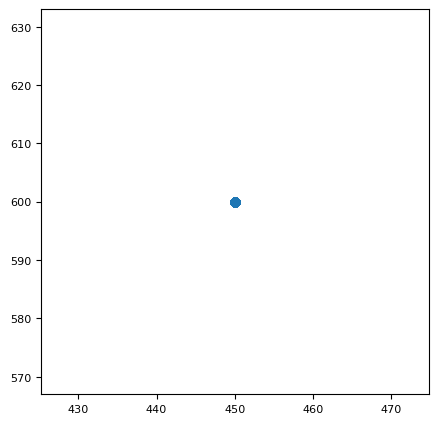

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(heights,widths)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()